In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
ad_clicks_csv = pd.read_csv('../Resources/network_ad_demographics.csv')
ad_clicks = ad_clicks_csv.drop('User ID', 1)
ad_clicks

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
ad_clicks.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


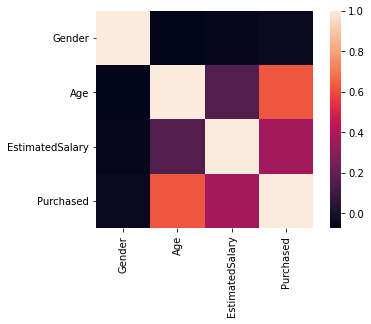

,Gender,Age,EstimatedSalary,Purchased
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0
399,0,49,36000,1


In [4]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders


# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(ad_clicks)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

encoded_data.tail(5)

<h4>Standard Scaler, Train-Test Split Logistic Regression 

In [5]:
X = encoded_data.iloc[:,0:3]
y = encoded_data.iloc[:,3]

ss = StandardScaler()

X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

<h4>Model Testing

In [6]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

<AxesSubplot:>

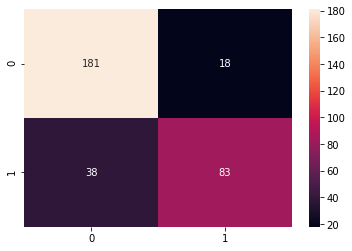

In [7]:
cm = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot = True, fmt = 'd')

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



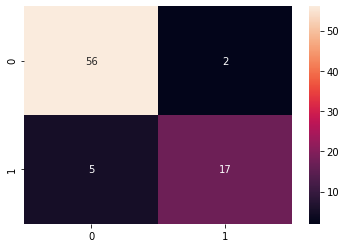

In [8]:
y_pred_test = lr.predict(X_test)

cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot = True, fmt = 'd')
print(classification_report(y_test, y_pred_test))

<h4>Gender WoE 

In [9]:
gender_count = encoded_data["Gender"].value_counts()


gender_p = (encoded_data.loc[encoded_data.Purchased==1]).Gender.value_counts()
gender_np = (encoded_data.loc[encoded_data.Purchased==0]).Gender.value_counts()
total_p = (encoded_data.loc[encoded_data.Purchased==1]).Gender.count()
total_np = (encoded_data.loc[encoded_data.Purchased==0]).Gender.count()

perc_p = gender_p/total_p*100
perc_np = gender_np/total_np*100
woe = perc_p/perc_np*100
iv = woe* (perc_p-perc_np)

gender_woe = pd.DataFrame({"Total Count":gender_count, "Purchased":gender_p, "Not Purchased":gender_np, "%P": perc_p.map("{0:.2f}%".format), "%NP": perc_np.map("{0:.2f}%".format), "WOE": woe*.01, "IV": iv*.01})
gender_woe

,Total Count,Purchased,Not Purchased,%P,%NP,WOE,IV
0,204,77,127,53.85%,49.42%,1.089643,4.826911
1,196,66,130,46.15%,50.58%,0.912426,-4.041875


<h4>Age WoE

In [47]:
age_count = encoded_data["Age"].value_counts()

#column count references
age_p = (encoded_data.loc[encoded_data.Purchased==1]).Age.value_counts()
age_np = (encoded_data.loc[encoded_data.Purchased==0]).Age.value_counts()
total_age_p = (encoded_data.loc[encoded_data.Purchased==1]).Age.count()
total_age_np = (encoded_data.loc[encoded_data.Purchased==0]).Age.count()

#calculations
perc_age_p = age_p/total_age_p*100
perc_age_np = age_np/total_age_np*100
woe = perc_age_p/perc_age_np*.01
iv = woe* (perc_age_p-perc_age_np)

#dataframe 
age_woe = pd.DataFrame({"Total Count":age_count, "Purchased":age_p, "Not Purchased":age_np, "%P": perc_age_p.map("{0:.2f}%".format), "%NP": perc_age_np.map("{0:.2f}%".format), "WOE": woe, "IV": iv})

age_woe = age_woe.fillna(0)
age_woe.tail(20)

,Total Count,Purchased,Not Purchased,%P,%NP,WOE,IV
41,16,1.0,15.0,0.70%,5.84%,0.001198,-0.006155
42,16,6.0,10.0,4.20%,3.89%,0.010783,0.003286
43,3,2.0,1.0,1.40%,0.39%,0.035944,0.036285
44,2,1.0,1.0,0.70%,0.39%,0.017972,0.005575
45,7,6.0,1.0,4.20%,0.39%,0.107832,0.410485
46,12,7.0,5.0,4.90%,1.95%,0.025161,0.074214
47,14,12.0,2.0,8.39%,0.78%,0.107832,0.820969
48,14,13.0,1.0,9.09%,0.39%,0.233636,2.033058
49,10,8.0,2.0,5.59%,0.78%,0.071888,0.346227
50,4,3.0,1.0,2.10%,0.39%,0.053916,0.092132


<h4>Tier-marked Salary Groupings

In [11]:
salary_conditions = [
(encoded_data.EstimatedSalary <= 26000) & (encoded_data.EstimatedSalary >= 15000),
(encoded_data.EstimatedSalary <= 40000) & (encoded_data.EstimatedSalary > 26000),
(encoded_data.EstimatedSalary <= 55000) & (encoded_data.EstimatedSalary > 40000),
(encoded_data.EstimatedSalary <= 67000) & (encoded_data.EstimatedSalary > 55000),
(encoded_data.EstimatedSalary <= 81000) & (encoded_data.EstimatedSalary > 67000),  
(encoded_data.EstimatedSalary <= 100000) & (encoded_data.EstimatedSalary > 81000),  
(encoded_data.EstimatedSalary <= 120000) & (encoded_data.EstimatedSalary > 100000),  
(encoded_data.EstimatedSalary <= 135000) & (encoded_data.EstimatedSalary > 120000),  
(encoded_data.EstimatedSalary <= 150000) & (encoded_data.EstimatedSalary > 135000),  
]
salary_values = ["15k-26k","26k-40k","40k-55k","55k-67k","67k-81k","81k-100k", "100k-120k","120k-135k","135k-150k"]
encoded_data['Salary_Group'] = np.select(salary_conditions, salary_values)
encoded_data

,Gender,Age,EstimatedSalary,Purchased,Salary_Group
0,1,19,19000,0,15k-26k
1,1,35,20000,0,15k-26k
2,0,26,43000,0,40k-55k
3,0,27,57000,0,55k-67k
4,1,19,76000,0,67k-81k
...,...,...,...,...,...
395,0,46,41000,1,40k-55k
396,1,51,23000,1,15k-26k
397,0,50,20000,1,15k-26k
398,1,36,33000,0,26k-40k


<h4>WoE encoding using tier-marked Salary groupings

In [12]:
sal_count = encoded_data["Salary_Group"].value_counts()

#column count references
sal_p = (encoded_data.loc[encoded_data.Purchased==1]).Salary_Group.value_counts()
sal_np = (encoded_data.loc[encoded_data.Purchased==0]).Salary_Group.value_counts()
total_sal_p = (encoded_data.loc[encoded_data.Purchased==1]).Salary_Group.count()
total_sal_np = (encoded_data.loc[encoded_data.Purchased==0]).Salary_Group.count()

#calculations
perc_sal_p = sal_p/total_sal_p*100
perc_sal_np = sal_np/total_sal_np*100
woe = perc_sal_p/perc_sal_np*.01
iv = woe* (perc_sal_p-perc_sal_np)

#dataframe 
sal_woe = pd.DataFrame({"Total Count":sal_count, "Purchased":sal_p, "Not Purchased":sal_np, "%P": perc_sal_p.map("{0:.2f}%".format), "%NP": perc_sal_np.map("{0:.2f}%".format), "WOE": woe, "IV": iv})
sal_woe 

,Total Count,Purchased,Not Purchased,%P,%NP,WOE,IV
100k-120k,32,24,8,16.78%,3.11%,0.053916,0.737053
120k-135k,19,17,2,11.89%,0.78%,0.152762,1.697173
135k-150k,22,21,1,14.69%,0.39%,0.377413,5.395569
15k-26k,42,13,29,9.09%,11.28%,0.008056,-0.017669
26k-40k,45,22,23,15.38%,8.95%,0.017191,0.110625
40k-55k,61,10,51,6.99%,19.84%,0.003524,-0.045287
55k-67k,47,2,45,1.40%,17.51%,0.000799,-0.012869
67k-81k,79,13,66,9.09%,25.68%,0.003540,-0.058728
81k-100k,53,21,32,14.69%,12.45%,0.011794,0.026348


<h4> Mapping WoE encoded Variables 

In [13]:
woe_encoded_data = encoded_data
woe_encoded_data.loc[:,'age_WoE_ENC'] = encoded_data['Age'].map(age_woe['WOE'])
woe_encoded_data.loc[:,'sal_WoE_ENC'] = encoded_data['Salary_Group'].map(sal_woe['WOE'])
woe_encoded_data.loc[:,'gender_WoE_ENC'] = encoded_data['Gender'].map(gender_woe['WOE'])

woe_encoded_data.tail(20)

,Gender,Age,EstimatedSalary,Purchased,Salary_Group,age_WoE_ENC,sal_WoE_ENC,gender_WoE_ENC
380,1,42,64000,0,55k-67k,0.010783,0.000799,0.912426
381,1,48,33000,1,26k-40k,0.233636,0.017191,0.912426
382,0,44,139000,1,135k-150k,0.017972,0.377413,1.089643
383,1,49,28000,1,26k-40k,0.071888,0.017191,0.912426
384,0,57,33000,1,26k-40k,0.000000,0.017191,1.089643
385,1,56,60000,1,55k-67k,0.000000,0.000799,0.912426
386,0,49,39000,1,26k-40k,0.071888,0.017191,1.089643
387,1,39,71000,0,67k-81k,0.011981,0.003540,0.912426
388,1,47,34000,1,26k-40k,0.107832,0.017191,0.912426
389,0,48,35000,1,26k-40k,0.233636,0.017191,1.089643


<h4>WoE encoded DataFrame

In [14]:
woe_encoded_map = woe_encoded_data.drop(columns=['Gender', 'Age','EstimatedSalary', 'Salary_Group'])
woe_encoded_map.tail(20)

,Purchased,age_WoE_ENC,sal_WoE_ENC,gender_WoE_ENC
380,0,0.010783,0.000799,0.912426
381,1,0.233636,0.017191,0.912426
382,1,0.017972,0.377413,1.089643
383,1,0.071888,0.017191,0.912426
384,1,0.000000,0.017191,1.089643
385,1,0.000000,0.000799,0.912426
386,1,0.071888,0.017191,1.089643
387,0,0.011981,0.003540,0.912426
388,1,0.107832,0.017191,0.912426
389,1,0.233636,0.017191,1.089643


<h4>Standard Scaler, Train-Test Split Logistic Regression on WoE encoded variables

In [15]:
X = woe_encoded_map.iloc[:,1:]
y = woe_encoded_map.iloc[:,0]

In [16]:
ss = StandardScaler()

X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

<AxesSubplot:>

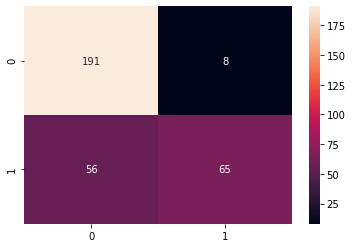

In [18]:
cm = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot = True, fmt = 'd')

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        58
           1       0.88      0.68      0.77        22

    accuracy                           0.89        80
   macro avg       0.89      0.82      0.85        80
weighted avg       0.89      0.89      0.88        80



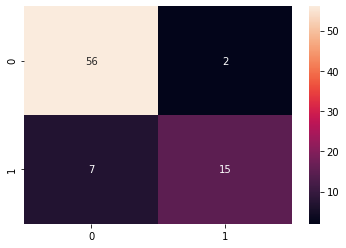

In [19]:
y_pred_test = lr.predict(X_test)

cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot = True, fmt = 'd')
print(classification_report(y_test, y_pred_test))

<h4>Strategy Tier Testing - Part 1

<h4>Target Age Groupings

In [20]:
age_conditions = [
(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18),
(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26),
(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36),
(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46),
(ad_clicks.Age >= 56),
]
age_values = ["18-25","26-35","36-45","46-55","55+"]
ad_clicks['Age Group'] = np.select(age_conditions, age_values)

<h4>Optimized Salary Groupings

In [21]:
salary_conditions = [
(ad_clicks.EstimatedSalary <= 26000) & (ad_clicks.EstimatedSalary >= 15000),
(ad_clicks.EstimatedSalary <= 40000) & (ad_clicks.EstimatedSalary > 26000),
(ad_clicks.EstimatedSalary <= 55000) & (ad_clicks.EstimatedSalary > 40000),
(ad_clicks.EstimatedSalary <= 67000) & (ad_clicks.EstimatedSalary > 55000),
(ad_clicks.EstimatedSalary <= 81000) & (ad_clicks.EstimatedSalary > 67000),  
(ad_clicks.EstimatedSalary <= 100000) & (ad_clicks.EstimatedSalary > 81000),  
(ad_clicks.EstimatedSalary <= 120000) & (ad_clicks.EstimatedSalary > 100000),  
(ad_clicks.EstimatedSalary <= 135000) & (ad_clicks.EstimatedSalary > 120000),  
(ad_clicks.EstimatedSalary <= 150000) & (ad_clicks.EstimatedSalary > 135000),  
]
salary_values = ["15k-26k","26k-40k","40k-55k","55k-67k","67k-81k","81k-100k", "100k-120k","120k-135k","135k-150k"]
ad_clicks['Salary Group'] = np.select(salary_conditions, salary_values)
del ad_clicks['Age']
del ad_clicks['EstimatedSalary']
ad_clicks

,Gender,Purchased,Age Group,Salary Group
0,Male,0,18-25,15k-26k
1,Male,0,26-35,15k-26k
2,Female,0,26-35,40k-55k
3,Female,0,26-35,55k-67k
4,Male,0,18-25,67k-81k
...,...,...,...,...
395,Female,1,46-55,40k-55k
396,Male,1,46-55,15k-26k
397,Female,1,46-55,15k-26k
398,Male,0,36-45,26k-40k


<h4>One-Hot Encoding for Segment-Wise Distribution

In [22]:
# Apply one-hot-encoding to the new dataframe

# Select the numeric columns
numeric_subset = ad_clicks.select_dtypes('number')
categorical_subset = ad_clicks.select_dtypes('object')

# One hot encoding
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns])
#drop Purchased column
#numeric_subset = numeric_subset.drop("Purchased", axis=1)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
print (features.head())

   Purchased  Gender_Female  Gender_Male  Age Group_18-25  Age Group_26-35  \
0          0              0            1                1                0   
1          0              0            1                0                1   
2          0              1            0                0                1   
3          0              1            0                0                1   
4          0              0            1                1                0   

   Age Group_36-45  Age Group_46-55  Age Group_55+  Salary Group_100k-120k  \
0                0                0              0                       0   
1                0                0              0                       0   
2                0                0              0                       0   
3                0                0              0                       0   
4                0                0              0                       0   

   Salary Group_120k-135k  Salary Group_135k-150k  Salary Grou

In [23]:
binary_list = list(features.columns)
binary_list

['Purchased',
 'Gender_Female',
 'Gender_Male',
 'Age Group_18-25',
 'Age Group_26-35',
 'Age Group_36-45',
 'Age Group_46-55',
 'Age Group_55+',
 'Salary Group_100k-120k',
 'Salary Group_120k-135k',
 'Salary Group_135k-150k',
 'Salary Group_15k-26k',
 'Salary Group_26k-40k',
 'Salary Group_40k-55k',
 'Salary Group_55k-67k',
 'Salary Group_67k-81k',
 'Salary Group_81k-100k']

In [45]:
features.head()

,Purchased,Gender_Female,Gender_Male,Age Group_18-25,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_55+,Salary Group_100k-120k,Salary Group_120k-135k,Salary Group_135k-150k,Salary Group_15k-26k,Salary Group_26k-40k,Salary Group_40k-55k,Salary Group_55k-67k,Salary Group_67k-81k,Salary Group_81k-100k
0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0


<h4>K-fold cross-validation binary-encoded logistic regression (using one-hot encoded variables)

note: Standard Scaling not necessary one-hot encoded variables (already normalized) unless used in conjuction with continuous variables

In [24]:
X = features.iloc[:,1:]
y = features.iloc[:,0]

In [25]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)
y_pred = cross_val_predict(model, X, y, cv=kfold)
conf_matrix = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print(conf_matrix)
print(report)

Accuracy: 87.250% (6.490%)
[[240  17]
 [ 34 109]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       257
           1       0.87      0.76      0.81       143

    accuracy                           0.87       400
   macro avg       0.87      0.85      0.86       400
weighted avg       0.87      0.87      0.87       400



<h4>TTS binary logistic regression (using one-hot encoded variables)

Confusion Matrix, Classification Report

note: Standard Scaling not necessary one-hot encoded variables (already normalized) unless used in conjuction with continuous variables

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
report = classification_report(y_test, predicted)
print(matrix)
print(report)

[[49  3]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.89      0.86      0.87        28

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



<h4>Strategy Tier Testing pt2

<h4>Weight of Evidence, IV Encoding class variables 

In [27]:
ad_clicks.rename(columns = {"Age Group": "Age_Group"}, inplace=True)
ad_clicks.rename(columns = {"Salary Group": "Salary_Group"}, inplace=True)
ad_clicks.head()

,Gender,Purchased,Age_Group,Salary_Group
0,Male,0,18-25,15k-26k
1,Male,0,26-35,15k-26k
2,Female,0,26-35,40k-55k
3,Female,0,26-35,55k-67k
4,Male,0,18-25,67k-81k


<h4>Gender WoE

In [28]:
gender_count = ad_clicks["Gender"].value_counts()


gender_p = (ad_clicks.loc[ad_clicks.Purchased==1]).Gender.value_counts()
gender_np = (ad_clicks.loc[ad_clicks.Purchased==0]).Gender.value_counts()
total_p = (ad_clicks.loc[ad_clicks.Purchased==1]).Gender.count()
total_np = (ad_clicks.loc[ad_clicks.Purchased==0]).Gender.count()

perc_p = gender_p/total_p*100
perc_np = gender_np/total_np*100
woe = perc_p/perc_np*100
iv = woe* (perc_p-perc_np)

gender_woe = pd.DataFrame({"Total Count":gender_count, "Purchased":gender_p, "Not Purchased":gender_np, "%P": perc_p.map("{0:.2f}%".format), "%NP": perc_np.map("{0:.2f}%".format), "WOE": woe*.01, "IV": iv*.01})
gender_woe


,Total Count,Purchased,Not Purchased,%P,%NP,WOE,IV
Female,204,77,127,53.85%,49.42%,1.089643,4.826911
Male,196,66,130,46.15%,50.58%,0.912426,-4.041875


<h4>Age WoE

In [29]:
age_count = ad_clicks["Age_Group"].value_counts()

#column count references
age_p = (ad_clicks.loc[ad_clicks.Purchased==1]).Age_Group.value_counts()
age_p['18-25']=0#accounts for NaN
age_np = (ad_clicks.loc[ad_clicks.Purchased==0]).Age_Group.value_counts()
total_age_p = (ad_clicks.loc[ad_clicks.Purchased==1]).Age_Group.count()
total_age_np = (ad_clicks.loc[ad_clicks.Purchased==0]).Age_Group.count()

#calculations
perc_age_p = age_p/total_age_p*100
perc_age_np = age_np/total_age_np*100
woe = perc_age_p/perc_age_np*.01
iv = woe* (perc_age_p-perc_age_np)

#dataframe 
age_woe = pd.DataFrame({"Total Count":age_count, "Purchased":age_p, "Not Purchased":age_np, "%P": perc_age_p.map("{0:.2f}%".format), "%NP": perc_age_np.map("{0:.2f}%".format), "WOE": woe, "IV": iv})
age_woe


,Total Count,Purchased,Not Purchased,%P,%NP,WOE,IV
18-25,49,0,49,0.00%,19.07%,0.000000,-0.000000
26-35,129,17,112,11.89%,43.58%,0.002728,-0.086452
36-45,119,38,81,26.57%,31.52%,0.008431,-0.041685
46-55,75,62,13,43.36%,5.06%,0.085713,3.282651
55+,28,26,2,18.18%,0.78%,0.233636,4.066116


<h4>Salary WoE

In [30]:
sal_count = ad_clicks["Salary_Group"].value_counts()

#column count references
sal_p = (ad_clicks.loc[ad_clicks.Purchased==1]).Salary_Group.value_counts()
sal_np = (ad_clicks.loc[ad_clicks.Purchased==0]).Salary_Group.value_counts()
total_sal_p = (ad_clicks.loc[ad_clicks.Purchased==1]).Salary_Group.count()
total_sal_np = (ad_clicks.loc[ad_clicks.Purchased==0]).Salary_Group.count()

#calculations
perc_sal_p = sal_p/total_sal_p*100
perc_sal_np = sal_np/total_sal_np*100
woe = perc_sal_p/perc_sal_np*.01
iv = woe* (perc_sal_p-perc_sal_np)

#dataframe 
sal_woe = pd.DataFrame({"Total Count":sal_count, "Purchased":sal_p, "Not Purchased":sal_np, "%P": perc_sal_p.map("{0:.2f}%".format), "%NP": perc_sal_np.map("{0:.2f}%".format), "WOE": woe, "IV": iv})
sal_woe

,Total Count,Purchased,Not Purchased,%P,%NP,WOE,IV
100k-120k,32,24,8,16.78%,3.11%,0.053916,0.737053
120k-135k,19,17,2,11.89%,0.78%,0.152762,1.697173
135k-150k,22,21,1,14.69%,0.39%,0.377413,5.395569
15k-26k,42,13,29,9.09%,11.28%,0.008056,-0.017669
26k-40k,45,22,23,15.38%,8.95%,0.017191,0.110625
40k-55k,61,10,51,6.99%,19.84%,0.003524,-0.045287
55k-67k,47,2,45,1.40%,17.51%,0.000799,-0.012869
67k-81k,79,13,66,9.09%,25.68%,0.003540,-0.058728
81k-100k,53,21,32,14.69%,12.45%,0.011794,0.026348


<h4> Mapping WOE Encoded Variables

In [31]:
woe_ad_clicks = ad_clicks
woe_ad_clicks.loc[:,'age_WoE_ENC'] = woe_ad_clicks['Age_Group'].map(age_woe['WOE'])
woe_ad_clicks.loc[:,'sal_WoE_ENC'] = woe_ad_clicks['Salary_Group'].map(sal_woe['WOE'])
woe_ad_clicks.loc[:,'gender_WoE_ENC'] = woe_ad_clicks['Gender'].map(gender_woe['WOE'])

woe_ad_clicks.tail(20)

,Gender,Purchased,Age_Group,Salary_Group,age_WoE_ENC,sal_WoE_ENC,gender_WoE_ENC
380,Male,0,36-45,55k-67k,0.008431,0.000799,0.912426
381,Male,1,46-55,26k-40k,0.085713,0.017191,0.912426
382,Female,1,36-45,135k-150k,0.008431,0.377413,1.089643
383,Male,1,46-55,26k-40k,0.085713,0.017191,0.912426
384,Female,1,55+,26k-40k,0.233636,0.017191,1.089643
385,Male,1,55+,55k-67k,0.233636,0.000799,0.912426
386,Female,1,46-55,26k-40k,0.085713,0.017191,1.089643
387,Male,0,36-45,67k-81k,0.008431,0.003540,0.912426
388,Male,1,46-55,26k-40k,0.085713,0.017191,0.912426
389,Female,1,46-55,26k-40k,0.085713,0.017191,1.089643


In [32]:
woe_ad_clicks = woe_ad_clicks.drop(columns=['Gender', 'Age_Group', 'Salary_Group'])
woe_ad_clicks.head()

,Purchased,age_WoE_ENC,sal_WoE_ENC,gender_WoE_ENC
0,0,0.000000,0.008056,0.912426
1,0,0.002728,0.008056,0.912426
2,0,0.002728,0.003524,1.089643
3,0,0.002728,0.000799,1.089643
4,0,0.000000,0.003540,0.912426


<h4>Log Regression using WoE encoded categorical variables, standard scalar, k-fold split

In [33]:
X = woe_ad_clicks.iloc[:,1:]
y = woe_ad_clicks.iloc[:,0]

In [34]:
#note: using SStandard Scalar on WoE
ss = StandardScaler()
X = ss.fit_transform(X)

In [35]:
kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)
y_pred = cross_val_predict(model, X, y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy, STD: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print(results)
conf_matrix = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)
ks = cohen_kappa_score(y, y_pred)
log_loss_score = log_loss(y, y_pred)
print(conf_matrix)
print(report)
print(ks)
print(log_loss_score)

Accuracy, STD: 87.750% (4.138%)
[0.8375 0.8375 0.875  0.95   0.8875]
[[241  16]
 [ 33 110]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       257
           1       0.87      0.77      0.82       143

    accuracy                           0.88       400
   macro avg       0.88      0.85      0.86       400
weighted avg       0.88      0.88      0.88       400

0.7261192778491979
4.231032092273767


Precision = of all the positive predicted, what percentage is truly positive.<br>
Not Purchased Precision: Of all clicks predicted to be Not Purchased by the model, 88% were truly Not Purchased.<br>
Purchased Precision: Of all clicks predicted to be Purchased by the model, 87% were truly Purchased.

Recall = of the total positive, what percentage are predicted positive. TPR (true positive rate)<br>
Not Purchased Recall: Of the total Not Purchased, the model predicted 94% correctly.<br>
Purchased Recall: Of the total Purchased, the model predicted 77% correctly.

F1 = weighted average of Precision and Recall. It takes both the False Positives and False Negatives into account.<br>
Not Purchased F1: The model was 91% accurate in identifying target Not Purchased correctly.<br>
Purchased F1: The model was 82% accurate in identifying target Purchased correctly.



<h4>ROC Curve

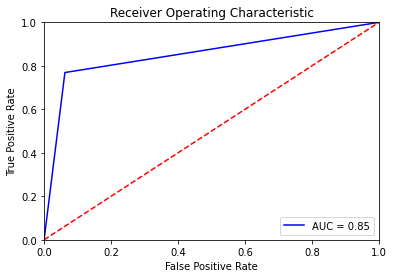

In [36]:
fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
actual_pred = pd.DataFrame({'Actual': y, 'Prediction':y_pred})
actual_pred

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
395,1,1
396,1,1
397,1,1
398,0,0


<h4>Mapping IV Encoded Variables

In [38]:
iv_ad_clicks = ad_clicks
iv_ad_clicks.loc[:,'age_IV_ENC'] = iv_ad_clicks['Age_Group'].map(age_woe['IV'])
iv_ad_clicks.loc[:,'sal_IV_ENC'] = iv_ad_clicks['Salary_Group'].map(sal_woe['IV'])
iv_ad_clicks.loc[:,'gender_IV_ENC'] = iv_ad_clicks['Gender'].map(gender_woe['IV'])
iv_ad_clicks.head() 

,Gender,Purchased,Age_Group,Salary_Group,age_WoE_ENC,sal_WoE_ENC,gender_WoE_ENC,age_IV_ENC,sal_IV_ENC,gender_IV_ENC
0,Male,0,18-25,15k-26k,0.000000,0.008056,0.912426,-0.000000,-0.017669,-4.041875
1,Male,0,26-35,15k-26k,0.002728,0.008056,0.912426,-0.086452,-0.017669,-4.041875
2,Female,0,26-35,40k-55k,0.002728,0.003524,1.089643,-0.086452,-0.045287,4.826911
3,Female,0,26-35,55k-67k,0.002728,0.000799,1.089643,-0.086452,-0.012869,4.826911
4,Male,0,18-25,67k-81k,0.000000,0.003540,0.912426,-0.000000,-0.058728,-4.041875


In [39]:
iv_ad_clicks = iv_ad_clicks.drop(columns=['Gender', 'Age_Group', 'Salary_Group', 'age_WoE_ENC', 'sal_WoE_ENC', 'gender_WoE_ENC'])
iv_ad_clicks.head()

,Purchased,age_IV_ENC,sal_IV_ENC,gender_IV_ENC
0,0,-0.000000,-0.017669,-4.041875
1,0,-0.086452,-0.017669,-4.041875
2,0,-0.086452,-0.045287,4.826911
3,0,-0.086452,-0.012869,4.826911
4,0,-0.000000,-0.058728,-4.041875


<h4>Log Regression using IV encoded categorical variables, standard scalar, k-fold split

In [40]:
X2 = iv_ad_clicks.iloc[:,1:]
y2 = iv_ad_clicks.iloc[:,0]

In [41]:
ss = StandardScaler()
X = ss.fit_transform(X2)

In [42]:
kfold2 = KFold(n_splits=5, random_state=0, shuffle=True)
model2 = LogisticRegression(solver='liblinear')
results2 = cross_val_score(model, X2, y2, cv=kfold)
y_pred2 = cross_val_predict(model, X2, y2, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy, STD: %.3f%% (%.3f%%)" % (results2.mean()*100.0, results2.std()*100.0))
print(results2)
conf_matrix2 = confusion_matrix(y2, y_pred2)
report2 = classification_report(y2, y_pred2)
log_loss_score2 = log_loss(y2, y_pred2)
print(conf_matrix2)
print(report2)
print(log_loss_score2)

Accuracy, STD: 87.750% (4.138%)
[0.8375 0.8375 0.875  0.95   0.8875]
[[241  16]
 [ 33 110]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       257
           1       0.87      0.77      0.82       143

    accuracy                           0.88       400
   macro avg       0.88      0.85      0.86       400
weighted avg       0.88      0.88      0.88       400

4.231032092273767


Precision = of all the positive predicted, what percentage is truly positive.<br>
Not Purchased Precision: Of all clicks predicted to be Not Purchased by the model, 88% were truly Not Purchased.<br>
Purchased Precision: Of all clicks predicted to be Positive by the model, 87% were truly Purchased.

Recall = of the total positive, what percentage are predicted positive. TPR (true positive rate)<br>
Not Purchased Recall: Of the total Not Purchased, the model predicted 94% correctly.<br>
Purchased Recall: Of the total Purchased, the model predicted 77% correctly.

F1 = weighted average of Precision and Recall. It takes both the False Positives and False Negatives into account.<br>
Not Purchased F1: The model was 91% accurate in identifying Not Purchased clicks correctly.<br>
Purchased F1: The model was 82% accurate in identifying Purchased clicks correctly.


<h4>ROC Curve

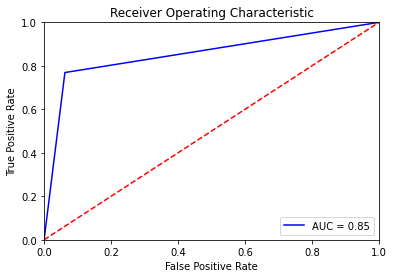

In [43]:
fpr, tpr, threshold = metrics.roc_curve(y2, y_pred2)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()